# Tutorial 1 - NetCDF files and xarray

In the first tutorial, we would like you to get familiar with NetCDF files using the xarray package, which are useful means to store geospatial climate data. Follow the steps below to get used to these data formats. Good luck!

## Arrays  
In this section, we would like you to get acquainted with the dataformat *arrays*, which provides some advantages over other dataformats, such as *lists*. An array in programming is a dataformat, holding a list of elements.  

Arrays are a lot like the data structure *list* in Python.  
Just like lists, array items are *enclosed in brackets [ ]*, they are *ordered*, *mutable*, and *able to store non-unique items*.

- Lists are a built-in datatype for Python and do not need to be declared:  
`list = ["string", 1, {key1: value1}]`  

- Whereas arrays are not built-in and need to be declared:  
    - Using the Python array module, which requires all elements to be of *the same data type*  
        `import array as arr`  
        `array = arr.array("i",[1, 2, 3])`
    - Or using the NumPy array module, which does *not* require all elements to be of the same data type  
        `import numpy as np`  
        `array = np.array(["string", 1, 2, 3])`

There are two main advantages of using an *array* over a *list* in Python: 
1. Arrays are more efficient in storing data (an array uses less memory and can be processed faster)
2. NumPy arrays can be used directly for numerical operations, which lists cannot.

### Example Python array
Run the following code and observe what happens when you perform a numerical operation on a Python list and a Pyhon array.  

*Hint*: You can run the code by pressing "ctrl+enter" in the code cell.

In [ ]:
## Python list
list = [2, 4, 6, 8]
division = list/2

In [ ]:
## Python array
import numpy as np
array = np.array([2, 4, 6, 8])
division = array/2

print(division)

## NetCDF files
In this module we will make use of NetCDF files. NetCDF files hold array-oriented data on spatial information in the form of: 
- latitudes and longitudes, 
- time, 
- scientific measurements; such as temperature, humidity, pressure, wind speed and direction  

NetCDF files are therefore extremely useful for holding climate data and performing analysis on that data. NetCDF is a data format, as well as a set of scienfic libraries created in particular for the Geosciences.


## Copernicus
In this exercise, we will retrieve NetCDF files from the Copernicus Climate Data Store (not to be confused with the Copernicus Institue of Sustainable Development). Copernicus is an Earth monitoring program that is managed by the European Union and its Agencies. They provide an API called Climate Data Store (CDS) to download any data relating to any climate or weather variable over a particular length of time and spatial range.

### ERA5 data
One of the main types of datasets provided by the Copernicus Climate Data Store Service is ERA5 data. See explanations here: https://climate.copernicus.eu/reanalysis-qas .
ERA5 is the fifth generation reanalysis for the global climate and weather for the past 8 decades, performed by the European Centre for Medium-Range Weather Forecasts (ECMWF). Data is available from 1940 onwards. The datset we will be using is "ERA5 hourly data on single levels from 1940 to present". It consists of hourly estimates for a large number of atmospheric, ocean-wave and land-surface quantities.

A complete overview of all variables available in the ERA5 data can be found here:   
https://cds.climate.copernicus.eu/datasets/reanalysis-era5-single-levels?tab=overview

Some non-exhaustive explanation of variables used in this course: 

- **100m u-component of wind in [m s-1]**  
    This parameter is the eastward component of the 100 m wind. It is the horizontal speed of air moving towards the east, at a height of 100 metres above the surface of the Earth, in metres per second. This parameter can be combined with the northward component to give the speed and direction of the horizontal 100 m wind.
      
- **100m v-component of wind [m s-1]**	
    This parameter is the northward component of the 100 m wind. It is the horizontal speed of air moving towards the north, at a height of 100 metres above the surface of the Earth, in metres per second. This parameter can be combined with the eastward component to give the speed and direction of the horizontal 100 m wind.
      
- **2m temperature	[K]**  
    This parameter is the temperature of air at 2m above the surface of land, sea or inland waters. This parameter has units of kelvin (K).

#### Exercise 1 - Get access to ERA5 API
In this exercise, we would like you to get access to the ERA5 API. An API (application program interface) can be used to download data, in this case weather data.  To do this, follow the steps below.

*Step 1:*  
- Create a new user account and get your API key.
- First, go to https://www.ecmwf.int to create an account.
- The same username and password can be used to access all datasets available at https://cds.climate.copernicus.eu/datasets. The first login to the CDS service redirects here: https://cds.climate.copernicus.eu/first-access.
- Use this page to complete your profile and accept the terms and conditions.
- You may select as Affiliation "Natural persons for non-commercial purposes" or "Research and education organisations".
- Under Thematic activities, choose "Energy" and under Activity sectors "Research and education".
- Click "Activate your profile".


*Step 2:*
- Follow the instructions for the CDS API setup: https://cds.climate.copernicus.eu/how-to-api to create a file called .cdsapirc in your home directory.
- Make sure you are logged in (check that your name appears at the top right corner).
   
This links to instructions for Windows: https://confluence.ecmwf.int/display/CKB/How+to+install+and+use+CDS+API+on+Windows , see more details below:

1. Go to your home directory (C:\Users\USERNAME)
2. Open your Notepad, edit the file as cdsapirc.txt
4. Write the following two lines in this file, see syntax in the black box under "1. Setup the CDS API personal access token" in https://cds.climate.copernicus.eu/how-to-api  
``url: https://cds.climate.copernicus.eu/api ``  
``key: abcdefghij-134-abcdefgad2391d3f `` #where key is _your_ CDS API personal access token, different than this example


**You can also retrieve your key by clicking your name in the top right of tha page (https://cds.climate.copernicus.eu/)-> Your Profile->API Key and copying the url and key:

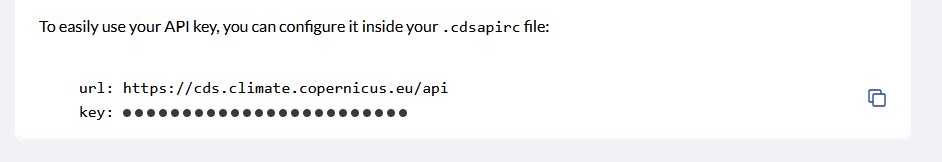

6. Save and exit, then rename the file as .cdsapirc (Bravely say Yes when Windows asks you if you are sure that you want to change the file extension).
 
For Mac users please follow a slightly different way of creating your .cdsapirc file: https://confluence.ecmwH.int/display/CKB/How+to+install+and+use+CDS+API+on+macOS

*Step 3:*  
Check that you have already installed the cdsapi package in Anaconda to access the API to download ERA5 data. Go to the Anaconda prompt (in Windows, look for it in the search bar or use cmd on MacOS) and activate your environment using the command ``conda activate <environment_name>``. You can find out what packages you have installed by using the command ``conda list``, including those installed with pip.  
Note that Version 0.7.2 of cdsapi or higher is required in order to be able to use the new Copernicus data stores. See the installation guide on BB.

#### Note: 
**Make sure to launch your Jupyter Notebook from the new environment, created especially for the ESM module. See for tips https://docs.conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html** 

#### Exercise 2 - Download NetCDF file
Download a NetCDF file of Europe, containing information on the hourly air temperature at 2 meters above the Earth’s surface for the month of December 2022. 

To do so, follow the following steps:
1. Go to the following website: https://cds.climate.copernicus.eu/datasets/reanalysis-era5-single-levels?tab=download   
2. Tick the right options, and save the file as a NetCDF4 format (don't worry that it's experimental). Click the "sub-region extraction" option and take the following coordinates for Europe:

- north = 71.22  
- south = 34.31 
- east = 51.29  
- west = -23.62  
3. At the bottom, click 'Show API request'.
4. Copy-Paste the API request code in the cell below. To keep things tidy, you may want to adjust the code, so that the NetCDF file is stored in the "data/era5" directory within the folder of your code.  
5. Run the code  

**Warning:** NetCDF file downloads can get extremely large, so be careful to check the right boxes before downloading.

In [ ]:
## Paste the API request here: 

import cdsapi

dataset = "reanalysis-era5-single-levels"
request = {
    "product_type": ["reanalysis"],
    "variable": ["2m_temperature"],
    "year": ["2022"],
    "month": ["12"],
    "day": [
        "01", "02", "03",
        "04", "05", "06",
        "07", "08", "09",
        "10", "11", "12",
        "13", "14", "15",
        "16", "17", "18",
        "19", "20", "21",
        "22", "23", "24",
        "25", "26", "27",
        "28", "29", "30",
        "31"
    ],
    "time": [
        "00:00", "01:00", "02:00",
        "03:00", "04:00", "05:00",
        "06:00", "07:00", "08:00",
        "09:00", "10:00", "11:00",
        "12:00", "13:00", "14:00",
        "15:00", "16:00", "17:00",
        "18:00", "19:00", "20:00",
        "21:00", "22:00", "23:00"
    ],
    "data_format": "netcdf",
    "download_format": "unarchived",
    "area": [71.22, -23.62, 34.31, 51.29]
}

client = cdsapi.Client()
client.retrieve(dataset, request).download()


## Xarray
Xarray is an open source Python package that makes it easier to work with labeled multi-dimensional arrays.   
This makes it a very suitable package for working with NetCDF files and the climate data it contains. 

We'll be demonstrating how you can open, access and work with the dataset that you downloaded in this tutorial. 

### Open aNetCDF files using xarray

To open a NetCDF file using xarray, first you'll have to import the xarray package (as with all Python packages).  
Then use the `open_dataset` function to read the NetCDF file:   

Run the code below to read your NetCDF file. Note that it assumes you have downloaded into a /data/era5 subfolder and the file is called download_new.nc. If needed, replace this with your chosen file name and location.  

In [2]:
import xarray as xr
ds = xr.open_dataset('b5c10f86b559a6be87c5982677502579.nc', engine='netcdf4')
ds

<xarray.Dataset> Size: 132MB
Dimensions:     (valid_time: 744, latitude: 148, longitude: 300)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 6kB 2022-12-01 ... 2022-12-31T23:...
  * latitude    (latitude) float64 1kB 71.06 70.81 70.56 ... 34.81 34.56 34.31
  * longitude   (longitude) float64 2kB -23.62 -23.37 -23.12 ... 50.88 51.13
    number      int64 8B ...
    expver      (valid_time) <U4 12kB ...
Data variables:
    t2m         (valid_time, latitude, longitude) float32 132MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-11-24T13:27 GRIB to CDM+CF via cfgrib-0.9.1...

You'll see that the file contains 3 coordinates: 
- longitude
- latitude
- time

There is only one data variable called "t2m", which is mapped to the coordinates. If you remember, this is the variable that we selected in the previous ERA5 download. This is the data for the "2m Temperature (2 meters above Earth's surface)" variable. As you can see when printing the NetCDF file above, this variable has  33,033,600 values. This can be derived from the number of longitude values (300), latitude values (148) and timestep values (744) considered. Hence, the variable 't2m' contains a value for every combination of longitude, latitude and time. This is why we say thta NetCDF files store **multi-dimensional** data. 

You can access the properties of the dataset with the following methods:   
- Dimensions: `ds.dims`   
- Coordinates: `ds.coords` 
- Attributes: `ds.attrs` 
- Data variables: `ds.data_vars` 

You can also access the data in a data variable: `ds['t2m'].data` 

Execute the code below to see the data dimensions, what data is contained in the t2m variable and what data type the t2m data is.

In [81]:
ds.dims

ds.data_vars

Data variables:
    t2m      (valid_time, latitude, longitude) float32 132MB 268.8 ... 272.7
    t2m_C    (valid_time, latitude, longitude) float32 132MB -4.393 ... -0.4813

In [4]:
ds['t2m'].data

array([[[268.75684, 268.10742, 267.63867, ..., 275.19238, 274.87793,
         274.57715],
        [269.4131 , 268.89648, 268.46094, ..., 275.31348, 275.03027,
         274.74707],
        [269.13477, 269.1494 , 268.93555, ..., 275.28125, 275.00586,
         274.7422 ],
        ...,
        [292.32227, 292.29492, 292.2871 , ..., 281.58008, 282.25293,
         282.42383],
        [292.4795 , 292.47852, 292.50586, ..., 281.5381 , 281.97266,
         282.48535],
        [292.63086, 292.64453, 292.70996, ..., 279.81152, 280.2881 ,
         281.24023]],

       [[269.2338 , 268.5668 , 268.08633, ..., 275.43985, 275.1293 ,
         274.80215],
        [269.8627 , 269.32852, 268.88126, ..., 275.60782, 275.2875 ,
         274.96915],
        [269.42813, 269.433  , 269.20645, ..., 275.61368, 275.2914 ,
         274.9799 ],
        ...,
        [292.1342 , 292.0873 , 292.05215, ..., 280.99258, 281.50333,
         281.49258],
        [292.41934, 292.41837, 292.3959 , ..., 280.76212, 281.18887,
   

In [5]:
type(ds['t2m'].data)

# ndarray = multidimensional array 

numpy.ndarray

### Time slicing using xarray
The ERA5 dataset that we've downloaded, contains data from the month of December in 2022. 
However, it's possible that you only want to know the data for a certain point in time, or a specific time interval. 

You can create a time slice of your dataset by using the `sel` method:   
    `import datetime`  
    `ds.sel(time = datetime.datetime(YYYY, MM, DD, hh, mm, ss))` 
    
You can also use the method `isel` to select a time slice by index instead of datetime value: 
    `ds.isel(time=0)`
    
It is recommended to read the documentation for this function: https://docs.xarray.dev/en/latest/generated/xarray.DataArray.sel.html
    
#### Exercise 3 - Creating a time slice 
Create a time slice of the t2m data for the datetime 2022-12-02 19:00:00

In [6]:
# Insert code for exercise 3 here
from datetime import datetime
ds.sel(valid_time=datetime(2022, 12, 2, 19, 0, 0)) # type: ignore 




<xarray.Dataset> Size: 181kB
Dimensions:     (latitude: 148, longitude: 300)
Coordinates:
  * latitude    (latitude) float64 1kB 71.06 70.81 70.56 ... 34.81 34.56 34.31
  * longitude   (longitude) float64 2kB -23.62 -23.37 -23.12 ... 50.88 51.13
    number      int64 8B ...
    valid_time  datetime64[ns] 8B 2022-12-02T19:00:00
    expver      <U4 16B ...
Data variables:
    t2m         (latitude, longitude) float32 178kB 267.0 267.1 ... 280.4 282.5
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-11-24T13:27 GRIB to CDM+CF via cfgrib-0.9.1...

You can also create a time slice based on a period of time.   
`time_start = datetime.datetime(YYYY, MM, DD, hh, mm, ss)`  
`time_end = datetime.datetime(YYYY, MM, DD, hh, mm, ss)`      
`ds.sel(time=slice(time_start, time_end))`

Similarly, you can also use the sel function to create slices on other aspects, e.g., longitude and latitude.

#### Exercise 4 - Creating a more elaborate time slice 
Create a time slice for the 2nd of December 2022, for longitude values between 10 and 42 degrees.

In [7]:
# Insert code for exercise 4 here

ds.sel(
    valid_time=datetime(2022, 12, 2),
    longitude=slice(10,42)
    ) # works


<xarray.Dataset> Size: 78kB
Dimensions:     (latitude: 148, longitude: 128)
Coordinates:
  * latitude    (latitude) float64 1kB 71.06 70.81 70.56 ... 34.81 34.56 34.31
  * longitude   (longitude) float64 1kB 10.13 10.38 10.63 ... 41.38 41.63 41.88
    number      int64 8B ...
    valid_time  datetime64[ns] 8B 2022-12-02
    expver      <U4 16B ...
Data variables:
    t2m         (latitude, longitude) float32 76kB 279.9 279.8 ... 284.2 284.6
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-11-24T13:27 GRIB to CDM+CF via cfgrib-0.9.1...

### Creating new variables for a NetCDF file
It is possible to create a new variable from existing variables. For instance, the new variable 't2m_C' can be created to show the temperature in degrees Celsius in your NetCDF dataset. 

In [8]:
#Create the new variable 't2m_C' in your NetCDF dataset

ds['t2m_C'] = ds['t2m'] -273.15


### Indexing in xarray
There is more than one method of accessing elements in an xarray DataArray.  
The `t2m` data variable is an example of such an xarray DataArray.

Instead of creating a time slice of the entire dataset, you can also create a timeslice of the `t2m` DataArray, using its index. 
The NetCDF file is indexed based on timestamp, so you can create a time slice of the `t2m` data variable by entering a specific date or datetime. 

You can do this by using the label-based index method for a given timestamp `loc("YYYY, MM, DD, hh, mm, ss")` or just a part of a timestamp `loc("YYYY, MM")`.

#### Exercise 5 - Slicing xarray data
Create a time slice of the t2m data for 15th of December 2022. 

In [9]:
# Insert code for exercise 5 here
from datetime import datetime

ds['t2m'].sel(valid_time=datetime(2022,12,15))

<xarray.DataArray 't2m' (latitude: 148, longitude: 300)> Size: 178kB
array([[251.43921, 250.93237, 251.24585, ..., 271.87378, 271.8181 , 271.781  ],
       [253.69995, 253.073  , 252.88159, ..., 271.54565, 271.5349 , 271.51245],
       [256.77026, 255.59058, 254.94702, ..., 271.3474 , 271.33862, 271.32886],
       ...,
       [290.5027 , 290.48315, 290.46265, ..., 277.69507, 278.14722, 278.29565],
       [290.76343, 290.71753, 290.6853 , ..., 276.34937, 277.073  , 279.14917],
       [291.0691 , 291.02124, 290.9724 , ..., 274.7898 , 275.8396 , 277.99194]],
      shape=(148, 300), dtype=float32)
Coordinates:
  * latitude    (latitude) float64 1kB 71.06 70.81 70.56 ... 34.81 34.56 34.31
  * longitude   (longitude) float64 2kB -23.62 -23.37 -23.12 ... 50.88 51.13
    number      int64 8B ...
    valid_time  datetime64[ns] 8B 2022-12-15
    expver      <U4 16B ...
Attributes: (12/32)
    GRIB_paramId:                             167
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      44400
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_totalNumber:                         0
    GRIB_units:                               K
    long_name:                                2 metre temperature
    units:                                    K
    standard_name:                            unknown
    GRIB_surface:                             0.0

### Plot data using xarray
You can plot the data for a given time slice using the `plot()` method. 

Check the documentation on this: https://docs.xarray.dev/en/latest/user-guide/plotting.html

#### Exercise 6 - Plotting xarray data
Plot the t2m data for the datetime 2022-12-02 19:00:00

In [14]:
type(ds)

xarray.core.dataset.Dataset

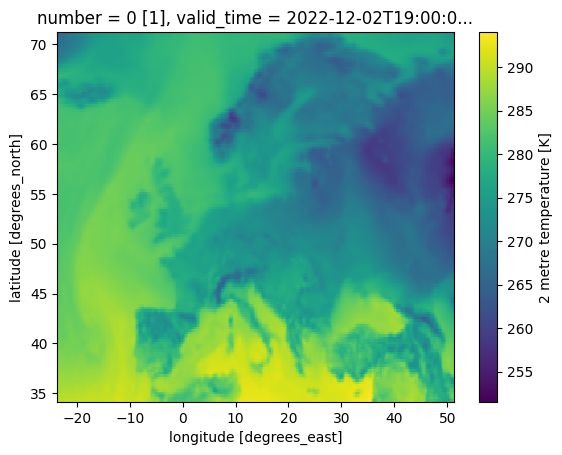

In [10]:
# Insert code for exercise 6 here

ds['t2m'].sel(valid_time=datetime(2022,12,2, 19, 0,0)).plot()

### Clip dataset using xarray
We've downloaded data for the area of Europe. However, if we want to analyze the data for a specific region within Europe, we can also make a slice in latitude and longitude to achieve that.   

We call this **clipping** the dataset: reducing the dataset to only a certain area of interest. 

You can do this in xarray by using the `where` method:  
`clipped_lon = (ds.longitude >= min_lon) & (ds.longitude <= max_lon)`   
`clipped_lat = (ds.latitude >= min_lat) & (ds.latitude <= max_lat)`   
`ds.where(clipped_lon & clipped_lat, drop=True)`  

#### Exercise 7 - Clipping and plotting
Clip the data to the Netherlands and use the `plot` method to display the results. 
*Hint:* Use Google maps to find the (approximate) coordinates for the Netherlands.  

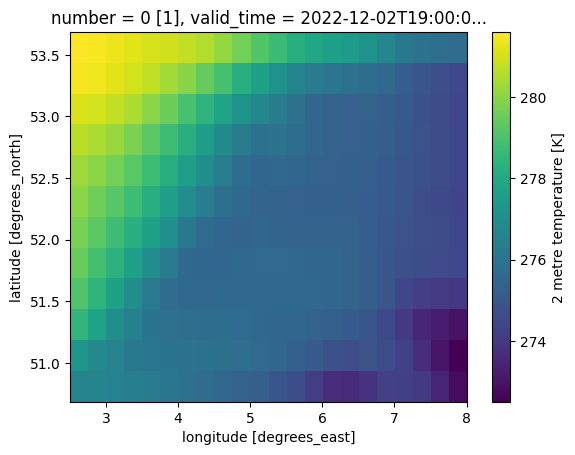

In [ ]:
# Insert code for exercise 7 here
# Zoom in on the netherlands
nl_lat_min= 50.661057082158905
nl_lat_max = 53.6077429284162
nl_long_min = 2.3866540751644654
nl_long_max =8.120751451718311


clipped_lon = (ds.longitude >= nl_long_min) & (ds.longitude <= nl_long_max)
clipped_lat = (ds.latitude >= nl_lat_min) & (ds.latitude <= nl_lat_max)

in_netherlands = clipped_lon & clipped_lat
ds_nl = ds.where(in_netherlands, drop=True)

ds_nl['t2m'].sel(valid_time=datetime(2022,12,2, 19, 0,0)).plot()

### Analysis with xarray
You can easily perform statistical analysis on climate data with xarray.  
You can for instance get the mean temperature over time, by using the `mean` method:  
`ds.t2m.mean(dim="time")`

Similarly, there are methods for the `median`, `min`, `max` and `mode` of a variable. Check the documentation for more! 

#### Exercise 8 - Plotting a mean value
Use the `plot` method to display the mean air temperature at 2 metres above the Earth's surface for Europe over the month December for 2022. 

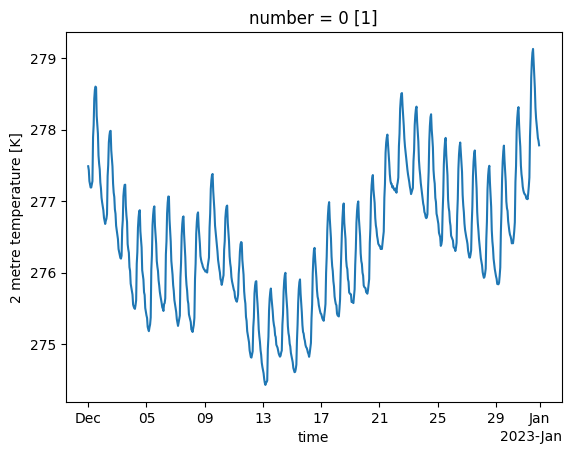

In [70]:
# Insert code for exercise 8 here

ds['t2m'].mean(dim=["longitude", "latitude"]).plot()

### Combining time slices, clipping and analysis

You can combine time slices and clipping in your analysis of a data set. 

#### Exercise 9 - Analysis of a sliced and clipped dataset 
Calculate the maximum air temperature at 2 metres above Earth's surface for the 5th of December for the Netherlands 

In [72]:
# Insert code for exercise 9 here


float(ds_nl['t2m'].sel(
    valid_time="2022-12-5"
).max()) - 273.15




9.293878173828148

#### Exercise 10: 
Use the `plot` method to display the _minimum_ air temperature at 2 metres above the Earth's surface for *the Netherlands* over the *5th of December* for 2022. 

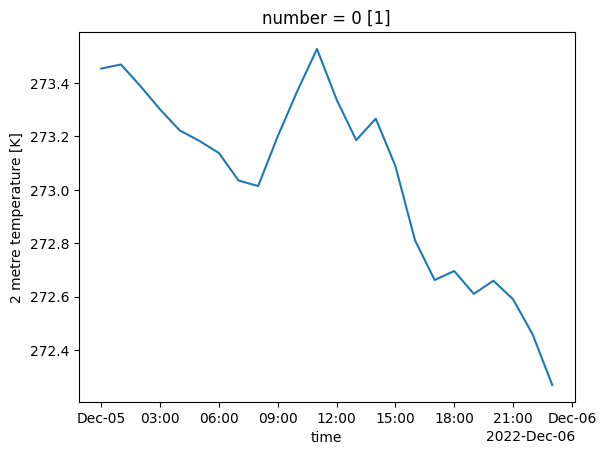

In [ ]:
# Insert code for exercise 10 here
ds_nl['t2m'].sel(valid_time="2022-12-05").min(dim=["latitude", 'longitude']).plot()

### *More info on xarray*
The xarray package is capable of much more than what we covered in this tutorial.   
If you want to learn more about the capabilities of the xarray package, you can find a full online tutorial here: https://tutorial.xarray.dev/overview/xarray-in-45-min.html